In [9]:
import sys
from pathlib import Path

# assume this notebook lives in notebooks/, so parent() is the repo root
sys.path.append(str(Path().resolve().parent))
from paths import PROJECT_ROOT

from benchmark.utils.data import annotate_mgf_with_label

import torch
import pytorch_lightning as pl

from massspecgym.data.transforms import SpecTokenizer
# from benchmark.data.datasets import ChlorineDetectionDataset
from benchmark.data.datasets import BinaryDetectionDataset
from benchmark.data.data_module import BenchmarkDataModule

from benchmark.models.lit_dreams_module import LitDreamsClassifier
from benchmark.models.lit_binary_classifier import LitBinaryClassifier



In [10]:
# Paths
DATA_DIR   = PROJECT_ROOT / "data" / "massspecgym"
ORIG_MGF   = DATA_DIR / "MassSpecGym.mgf"
LABELED_MGF = DATA_DIR / "MassSpecGym_fluorine.mgf"

MODEL_PATH = PROJECT_ROOT / "data" / "model_checkpoints" / "ssl_model.ckpt"

In [11]:
# Define labeling function: 1.0 if 'Cl' in FORMULA
label_fn = lambda md: float("F" in md.get("formula", ""))

In [12]:
# 2) Annotate (skips if already done)
BinaryDetectionDataset.annotate_mgf(
    input_pth  = ORIG_MGF,
    output_pth = LABELED_MGF,
    label_fn   = label_fn,
)

Overall label distribution:
  0: 217743 (94.2%)
  1: 13361 (5.8%)


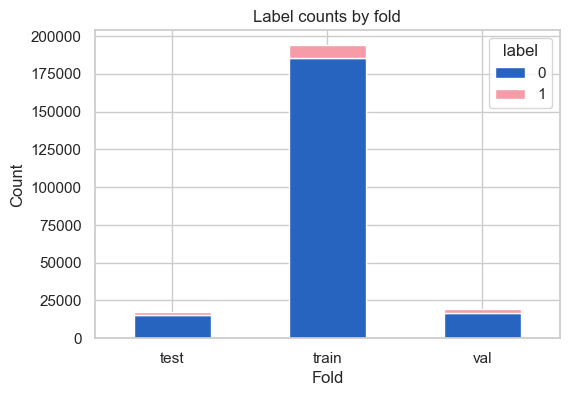

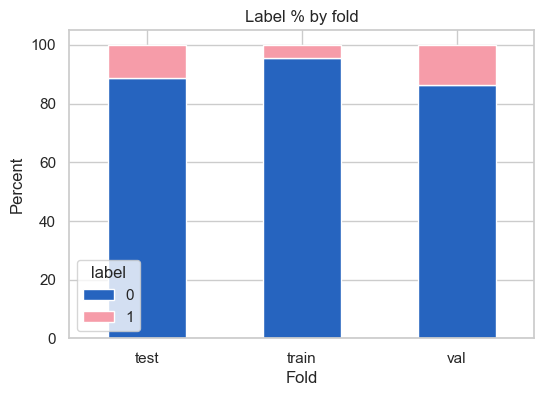

In [13]:
# 3) Inspect fold‐wise distribution
BinaryDetectionDataset.plot_fold_distribution(LABELED_MGF)


=== Example label 0 ===


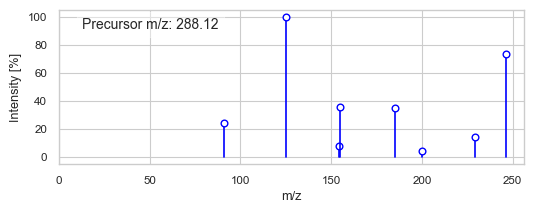

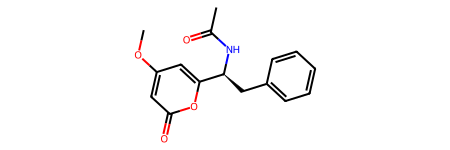

{'identifier': 'MassSpecGymID0000001', 'smiles': 'CC(=O)N[C@@H](CC1=CC=CC=C1)C2=CC(=CC(=O)O2)OC', 'inchikey': 'VFMQMACUYWGDOJ', 'formula': 'C16H17NO4', 'precursor_formula': 'C16H18NO4', 'parent_mass': '287.115224', 'precursor_mz': 288.1225, 'adduct': '[M+H]+', 'instrument_type': 'Orbitrap', 'collision_energy': '30.0', 'fold': 'train', 'simulation_challenge': 'True', 'label': '0'}

=== Example label 1 ===


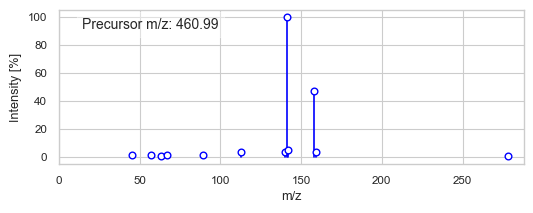

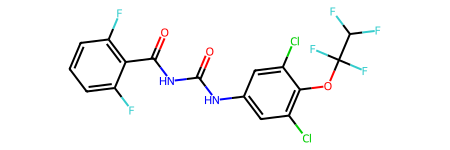

{'identifier': 'MassSpecGymID0002356', 'smiles': 'C1=CC(=C(C(=C1)F)C(=O)NC(=O)NC2=CC(=C(C(=C2)Cl)OC(C(F)F)(F)F)Cl)F', 'inchikey': 'RGNPBRKPHBKNKX', 'formula': 'C16H8Cl2F6N2O3', 'precursor_formula': 'C16H9Cl2F6N2O3', 'parent_mass': '459.9816172086', 'precursor_mz': 460.9888932086, 'adduct': '[M+H]+', 'instrument_type': 'QTOF', 'collision_energy': '40.0', 'fold': 'train', 'simulation_challenge': 'True', 'label': '1'}


In [14]:
# 4) Visualize one negative & one positive example
#    By default looks for 'library_SMILES'; override if your key is 'smiles'
BinaryDetectionDataset.visualize_examples(
    mgf_pth    = LABELED_MGF,
    smiles_key = 'smiles'
)